# RFE Example

Let's see what is this RFE stuff about

In [1]:
%matplotlib inline
print(__doc__)

from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt



Automatically created module for IPython interactive environment


# Digits

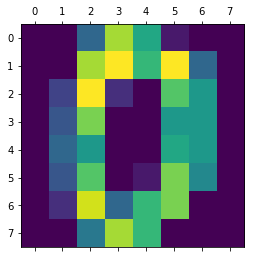

In [2]:
# Load the digits dataset
digits = load_digits()

plt.matshow(digits.images[0]);

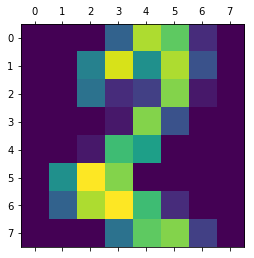

In [3]:
plt.matshow(digits.images[50]);

In [4]:

X = digits.images.reshape((len(digits.images), -1))
y = digits.target


In [5]:
X.shape

(1797, 64)

# SVM classifier


In [6]:

svc = SVC(kernel="linear", C=1)

svc.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
svc.score(X, y)

1.0

# Recursive Feature Elimination
    

In [8]:
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
rfe.fit(X, y)


RFE(estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
  n_features_to_select=1, step=1, verbose=0)

Let's convert the ranking to the same shape as the digits

In [9]:

ranking = rfe.ranking_.reshape(digits.images[0].shape)

In [10]:
rfe.ranking_

array([64, 50, 31, 23, 10, 17, 34, 51, 57, 37, 30, 43, 14, 32, 44, 52, 54,
       41, 19, 15, 28,  8, 39, 53, 55, 45,  9, 18, 20, 38,  1, 59, 63, 42,
       25, 35, 29, 16,  2, 62, 61, 40,  5, 11, 13,  6,  4, 58, 56, 47, 26,
       36, 24,  3, 22, 48, 60, 49,  7, 27, 33, 21, 12, 46])

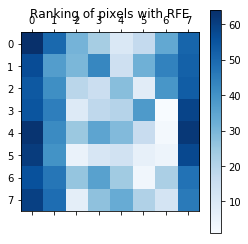

In [11]:


# Plot pixel ranking
plt.matshow(ranking, cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Ranking of pixels with RFE")
plt.show()

# RFE wrt to 1

In [12]:

target = y == 1

In [13]:
rfe = RFE(estimator=svc, n_features_to_select=10, step=1)
rfe.fit(X, target)


RFE(estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
  n_features_to_select=10, step=1, verbose=0)

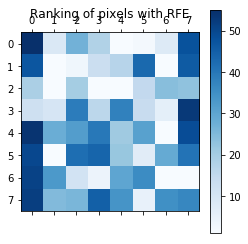

In [14]:
ranking = rfe.ranking_.reshape(digits.images[0].shape)

# Plot pixel ranking
plt.matshow(ranking, cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Ranking of pixels with RFE")
plt.show()

In [15]:
rfe.support_.sum()

10

In [16]:
X_rfe = X[:, rfe.support_]

svc.fit(X_rfe, target)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
svc.score(X_rfe, target)

0.96828046744574292